In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
#datasets to use
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
products_dataset = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
cd = pd.read_csv('olist_closed_deals_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
#merge
df = order_items.merge(order_payments, on='order_id', how='left')
df = df.merge(orders, on='order_id', how='left')
df = df.merge(cd, on='seller_id', how='left')
df = df.merge(products_dataset, on='product_id', how='left')
df = df.merge(translation, on='product_category_name', how='left')
df = df.merge(customers, on='customer_id', how='left')
df = df.merge(reviews,on='order_id',how='left')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118313,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
118314,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
118315,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
118316,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [4]:
#extract relevant columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118318 non-null  object 
 1   order_item_id                  118318 non-null  int64  
 2   product_id                     118318 non-null  object 
 3   seller_id                      118318 non-null  object 
 4   shipping_limit_date            118318 non-null  object 
 5   price                          118318 non-null  float64
 6   freight_value                  118318 non-null  float64
 7   payment_sequential             118315 non-null  float64
 8   payment_type                   118315 non-null  object 
 9   payment_installments           118315 non-null  float64
 10  payment_value                  118315 non-null  float64
 11  customer_id                    118318 non-null  object 
 12  order_status                  

In [5]:
df = pd.DataFrame(df[['product_id','customer_id','seller_id','customer_city','business_segment','payment_value','price','product_category_name_english','product_description_lenght','product_photos_qty','review_score']])
df.head(n=20)

,product_id,customer_id,seller_id,customer_city,business_segment,payment_value,price,product_category_name_english,product_description_lenght,product_photos_qty,review_score
0,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,campos dos goytacazes,NaN,72.19,58.90,cool_stuff,598.0,4.0,5
1,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,dd7ddc04e1b6c2c614352b383efe2d36,santa fe do sul,NaN,259.83,239.90,pet_shop,239.0,2.0,4
2,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,5b51032eddd242adc84c38acab88f23d,para de minas,NaN,216.87,199.00,furniture_decor,695.0,2.0,5
3,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,9d7a1d34a5052409006425275ba1c2b4,atibaia,NaN,25.78,12.99,perfumery,480.0,1.0,4
4,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,df560393f3a51e74553ab94004ba5c87,varzea paulista,NaN,218.04,199.90,garden_tools,409.0,1.0,5
5,ef92defde845ab8450f9d70c526ef70f,816cbea969fe5b689b39cfc97a506742,6426d21aca402a131fc0a5d0960a3c90,uberaba,NaN,34.59,21.90,housewares,558.0,1.0,4
6,8d4f2bb7e93e6710a28f34fa83ee7d28,32e2e6ab09e778d99bf2e0ecd4898718,7040e82f899a04d1b434b795a43b4617,guararapes,NaN,31.75,19.90,telephony,815.0,1.0,4
7,557d850972a7d6f792fd18ae1400d9b6,9ed5e522dd9dd85b4af4a077526d8117,5996cddab893a4652a15592fb58ab8db,praia grande,NaN,880.75,810.00,garden_tools,1310.0,3.0,5
8,310ae3c140ff94b03219ad0adc3c778f,16150771dfd4776261284213b89c304e,a416b6a846a11724393025641d4edd5e,santos,NaN,157.60,145.95,health_beauty,493.0,1.0,1
9,4535b0e1091c278dfd193e5a1d63b39f,351d3cb2cee3c7fd0af6616c82df21d3,ba143b05f0110f0dc71ad71b4466ce92,jandira,books,65.39,53.99,books_technical,1192.0,1.0,4


In [6]:
df = df.dropna(subset=['product_description_lenght', 'review_score'])

In [7]:
descript = pd.DataFrame(df['product_description_lenght'])
rating = pd.DataFrame(df['review_score'])

In [8]:
descript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116609 entries, 0 to 118317
Data columns (total 1 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_description_lenght  116609 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116609 entries, 0 to 118317
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   review_score  116609 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


<AxesSubplot:>

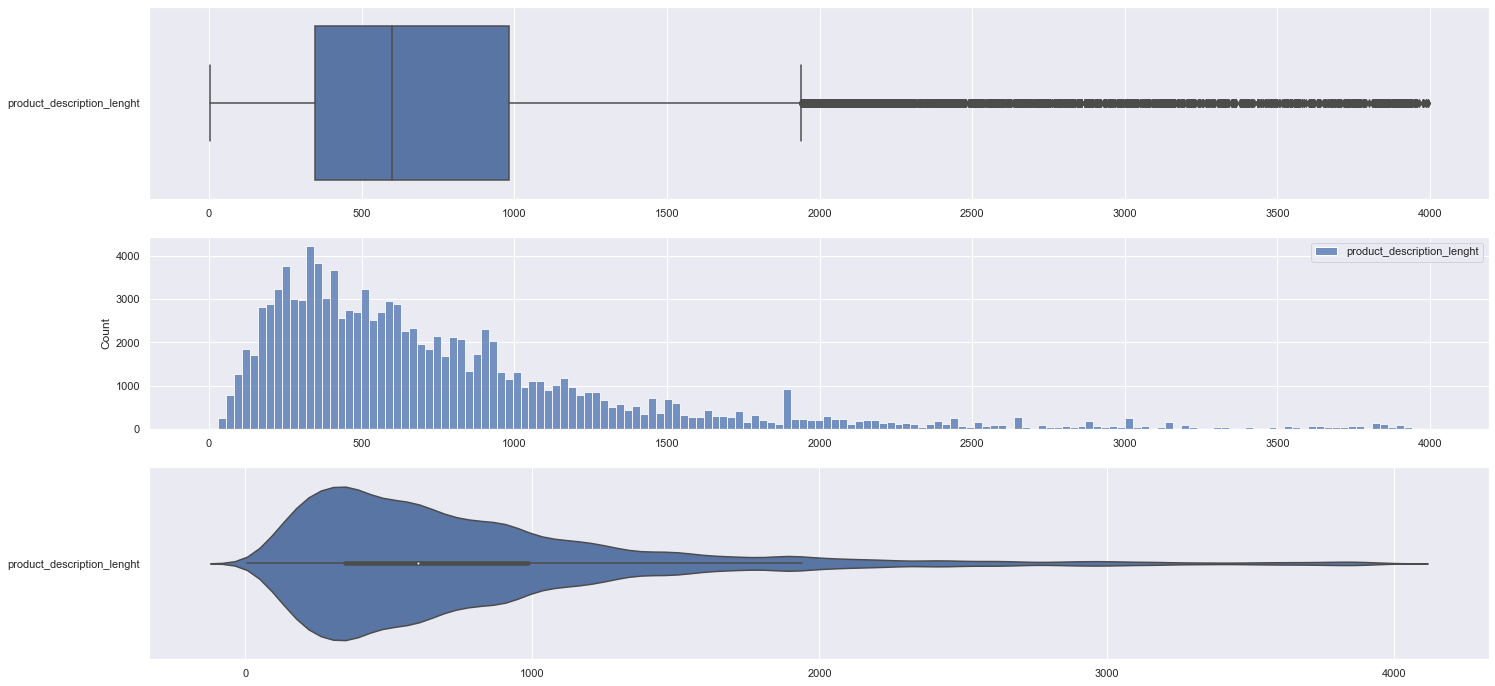

In [10]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, figsize=(24, 12))

# Plot the basic uni-variate figures for product description length
sb.boxplot(data = descript, orient = "h", ax = axes[0])
sb.histplot(data = descript, ax = axes[1])
sb.violinplot(data = descript, orient = "h", ax = axes[2])

<AxesSubplot:>

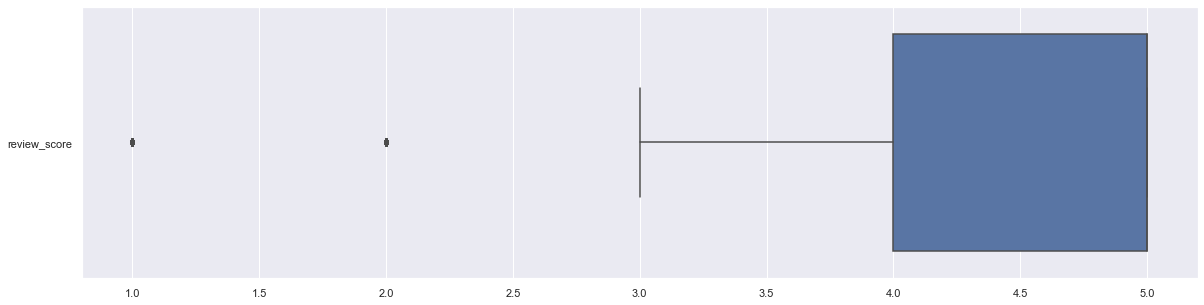

In [11]:
# Plot the basic uni-variate figures for rating
f = plt.figure(figsize=(20,5))
sb.boxplot(data = rating, orient = "h")

<Figure size 2880x360 with 0 Axes>

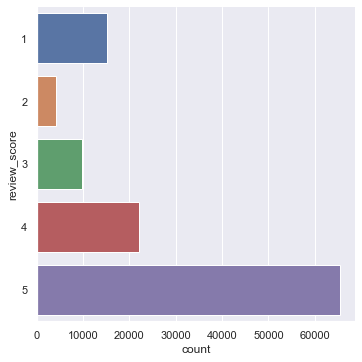

In [12]:
f = plt.figure(figsize=(40,5))
sb.catplot(y = 'review_score' , data = df, kind = "count")

In [13]:
df1 = df
df1 = df1[df1.review_score<5]
df1

,product_id,customer_id,seller_id,customer_city,business_segment,payment_value,price,product_category_name_english,product_description_lenght,product_photos_qty,review_score
1,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,dd7ddc04e1b6c2c614352b383efe2d36,santa fe do sul,NaN,259.83,239.90,pet_shop,239.0,2.0,4
3,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,9d7a1d34a5052409006425275ba1c2b4,atibaia,NaN,25.78,12.99,perfumery,480.0,1.0,4
5,ef92defde845ab8450f9d70c526ef70f,816cbea969fe5b689b39cfc97a506742,6426d21aca402a131fc0a5d0960a3c90,uberaba,NaN,34.59,21.90,housewares,558.0,1.0,4
6,8d4f2bb7e93e6710a28f34fa83ee7d28,32e2e6ab09e778d99bf2e0ecd4898718,7040e82f899a04d1b434b795a43b4617,guararapes,NaN,31.75,19.90,telephony,815.0,1.0,4
8,310ae3c140ff94b03219ad0adc3c778f,16150771dfd4776261284213b89c304e,a416b6a846a11724393025641d4edd5e,santos,NaN,157.60,145.95,health_beauty,493.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
118306,e7be84ea9462aac5e2b0b08eb35ba7f1,46b385c6d972b73cbcf797a8b16c072d,36a968b544695394e4e9d7572688598f,campinas,NaN,15.86,4.90,musical_instruments,103.0,1.0,1
118308,43423cdffde7fda63d0414ed38c11a73,4d3abb73ceb86353aeadbe698aa9d5cb,b1fc4f64df5a0e8b6913ab38803c57a9,serra talhada,NaN,356.76,55.00,watches_gifts,1159.0,4.0,4
118309,43423cdffde7fda63d0414ed38c11a73,4d3abb73ceb86353aeadbe698aa9d5cb,b1fc4f64df5a0e8b6913ab38803c57a9,serra talhada,NaN,356.76,55.00,watches_gifts,1159.0,4.0,4
118310,43423cdffde7fda63d0414ed38c11a73,4d3abb73ceb86353aeadbe698aa9d5cb,b1fc4f64df5a0e8b6913ab38803c57a9,serra talhada,NaN,356.76,55.00,watches_gifts,1159.0,4.0,4


<AxesSubplot:xlabel='review_score', ylabel='Count'>

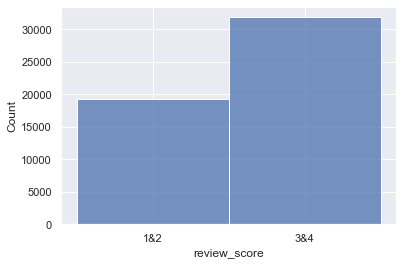

In [58]:
rating = pd.cut(x = df1['review_score'],bins = [0,2,4], labels = ['1&2','3&4'])
rating.value_counts()
sb.histplot(data = rating)

In [59]:
rating
descript = pd.DataFrame(df1['product_description_lenght'])    

In [134]:
#df = pd.DataFrame({'Data':np.random.normal(size=200)})
# example dataset of normally distributed data. 
# jointDF = jointDF[np.abs(jointDF.product_description_lenght-jointDF.product_description_lenght.mean()) <= (3*jointDF.product_description_lenght.std())]
# # keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# jointDF
jointDF = pd.concat([descript, rating], axis = 1)
jointDF = jointDF[jointDF.product_description_lenght<1800]
jointDF = jointDF.dropna()
jointDF
#df[~(np.abs(df.Data-df.Data.mean()) > (3*df.Data.std()))]

,product_description_lenght,review_score
1,239.0,3&4
3,480.0,3&4
5,558.0,3&4
6,815.0,3&4
8,493.0,1&2
...,...,...
118306,103.0,1&2
118308,1159.0,3&4
118309,1159.0,3&4
118310,1159.0,3&4


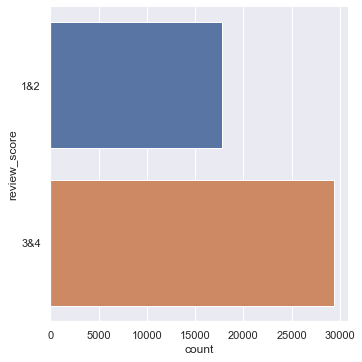

In [135]:
# f = plt.figure(figsize=(40,5))
sb.catplot(y = 'review_score' , data = jointDF, kind = "count")


<AxesSubplot:xlabel='product_description_lenght', ylabel='review_score'>

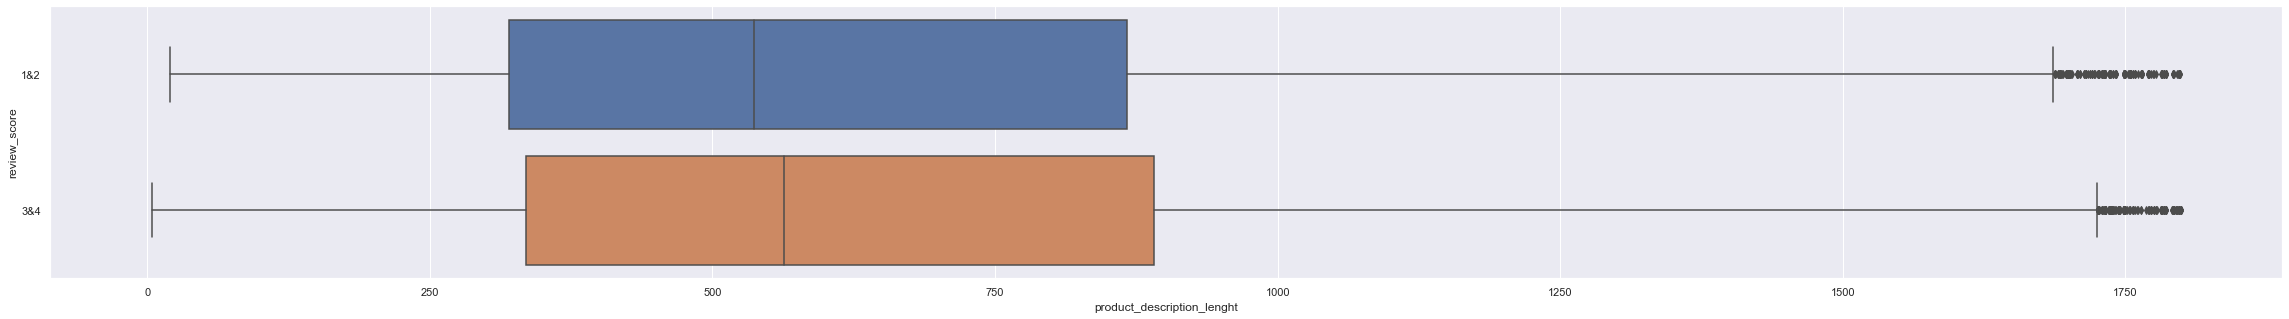

In [136]:
f = plt.figure(figsize=(40,5))
sb.boxplot(x = "product_description_lenght", y = "review_score", data = jointDF, orient = "h")

In [137]:
# f = plt.figure(figsize=(18, 6))
# sb.stripplot(x = "product_description_lenght", y = "review_score", data = jointDF, orient = "h")

In [138]:
payment_df = pd.DataFrame(df[['price','product_category_name_english']])
payment_df

,price,product_category_name_english
0,58.90,cool_stuff
1,239.90,pet_shop
2,199.00,furniture_decor
3,12.99,perfumery
4,199.90,garden_tools
...,...,...
118313,299.99,housewares
118314,350.00,computers_accessories
118315,99.90,sports_leisure
118316,55.99,computers_accessories


In [139]:
payment_df.groupby(by=["product_category_name_english"]).sum().sort_values(by=['price'],ascending = False)

,price
product_category_name_english,
health_beauty,1302046.97
watches_gifts,1254322.95
bed_bath_table,1107397.98
sports_leisure,1029631.88
computers_accessories,950134.59
...,...
flowers,1110.04
home_comfort_2,773.17
cds_dvds_musicals,730.00


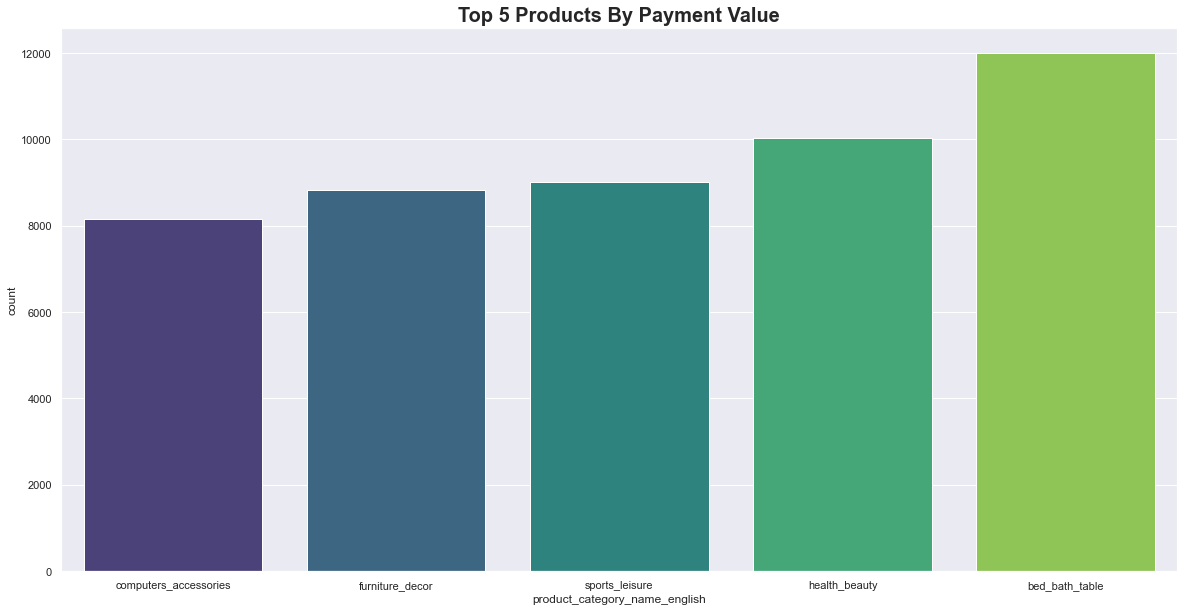

In [140]:
plt.figure(figsize=(20,10))
sb.countplot(x='product_category_name_english',data=payment_df, palette='viridis',order=payment_df['product_category_name_english'].value_counts()[:5].sort_values().index).set_title('Top 5 Products By Payment Value', fontsize=20, weight='bold')
plt.show()

### Finding out which city in South America has the highest concentration of purchases

In [141]:
city_data = df['customer_city']
city_data["Customer's City"] = df['customer_city'].str.capitalize()
city_data = city_data["Customer's City"].value_counts()
city_data = city_data.head(10)
city_data 

Sao paulo                18413
Rio de janeiro            8124
Belo horizonte            3219
Brasilia                  2452
Curitiba                  1799
Campinas                  1722
Porto alegre              1642
Salvador                  1498
Guarulhos                 1389
Sao bernardo do campo     1102
Name: customer_city, dtype: int64

<AxesSubplot:title={'center':'Top 10 Cities with highest purchases of Goods online'}>

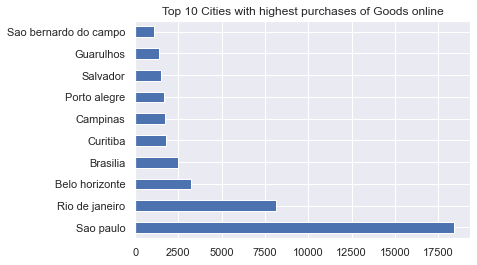

In [142]:
city_data.plot(kind = 'barh', title = 'Top 10 Cities with highest purchases of Goods online', legend= False)

In [143]:
# city_data2 = df.groupby(by=['customer_city']).sum().sort_values(by=['freight_value'], ascending = False)
# city_data2 = city_data2.head(10)
# city_data2

<ipython-input-144-7fa5a698f3d0>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  order_data['Weekly']= pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d').dt.week


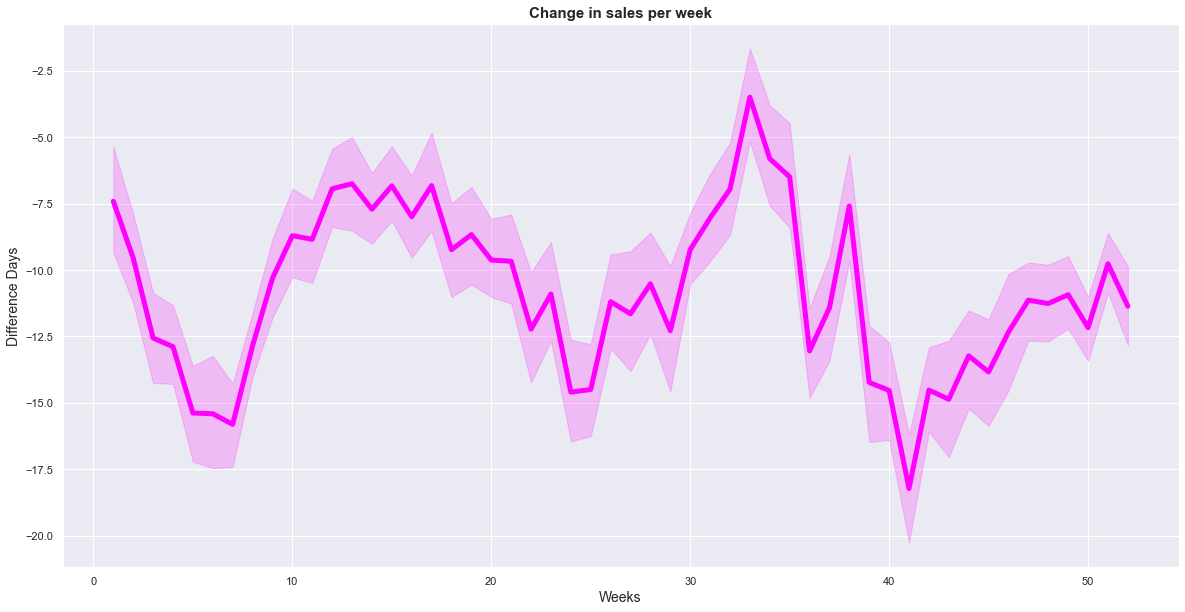

In [144]:
from datetime import datetime
# orders_dataset
order_data = pd.read_csv('olist_orders_dataset.csv')
order_data.isnull().sum()

#feature engineering with time

order_data['order_delivered_customer_date']= order_data['order_delivered_customer_date'].fillna(method='ffill')
order_data['order_delivered_customer_date'].isnull().sum()

order_data['delivered_time']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                            format='%Y-%m-%d').dt.date
order_data['estimate_time']=pd.to_datetime(order_data['order_estimated_delivery_date'], 
                                           format='%Y-%m-%d').dt.date

order_data['Weekly']= pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d').dt.week

order_data['yearly']=pd.to_datetime(order_data['order_delivered_customer_date']).dt.to_period('M')
order_data['yearly']= order_data['yearly'].astype(str)
order_data['diff_days']=order_data['delivered_time']-order_data['estimate_time']
order_data['diff_days']=order_data['diff_days'].dt.days

plt.figure(figsize=(20,10))
sb.lineplot(x='Weekly', y='diff_days',data=order_data, color='magenta',linewidth=5,markers=True,dashes=False,estimator='mean')
plt.xlabel('Weeks',size=14)
plt.ylabel('Difference Days',size=14)
plt.title('Change in sales per week', size=15, weight='bold')
plt.show()


SPLITTING DATAFRAME INTO TEST AND TRAIN


In [145]:
df1 = df1[df1.review_score<5]
df1

,product_id,customer_id,seller_id,customer_city,business_segment,payment_value,price,product_category_name_english,product_description_lenght,product_photos_qty,review_score
1,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,dd7ddc04e1b6c2c614352b383efe2d36,santa fe do sul,NaN,259.83,239.90,pet_shop,239.0,2.0,4
3,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,9d7a1d34a5052409006425275ba1c2b4,atibaia,NaN,25.78,12.99,perfumery,480.0,1.0,4
5,ef92defde845ab8450f9d70c526ef70f,816cbea969fe5b689b39cfc97a506742,6426d21aca402a131fc0a5d0960a3c90,uberaba,NaN,34.59,21.90,housewares,558.0,1.0,4
6,8d4f2bb7e93e6710a28f34fa83ee7d28,32e2e6ab09e778d99bf2e0ecd4898718,7040e82f899a04d1b434b795a43b4617,guararapes,NaN,31.75,19.90,telephony,815.0,1.0,4
8,310ae3c140ff94b03219ad0adc3c778f,16150771dfd4776261284213b89c304e,a416b6a846a11724393025641d4edd5e,santos,NaN,157.60,145.95,health_beauty,493.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
118306,e7be84ea9462aac5e2b0b08eb35ba7f1,46b385c6d972b73cbcf797a8b16c072d,36a968b544695394e4e9d7572688598f,campinas,NaN,15.86,4.90,musical_instruments,103.0,1.0,1
118308,43423cdffde7fda63d0414ed38c11a73,4d3abb73ceb86353aeadbe698aa9d5cb,b1fc4f64df5a0e8b6913ab38803c57a9,serra talhada,NaN,356.76,55.00,watches_gifts,1159.0,4.0,4
118309,43423cdffde7fda63d0414ed38c11a73,4d3abb73ceb86353aeadbe698aa9d5cb,b1fc4f64df5a0e8b6913ab38803c57a9,serra talhada,NaN,356.76,55.00,watches_gifts,1159.0,4.0,4
118310,43423cdffde7fda63d0414ed38c11a73,4d3abb73ceb86353aeadbe698aa9d5cb,b1fc4f64df5a0e8b6913ab38803c57a9,serra talhada,NaN,356.76,55.00,watches_gifts,1159.0,4.0,4


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

# rating = pd.DataFrame(df1['review_score'])   # Response
# descript = pd.DataFrame(df1['product_description_lenght']) # Predictor

# Split dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(descript, rating, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Rating scores corresponding to product description length
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
# print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6236144075532719

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6239730850481183



[Text(697.5, 543.6, 'product_description_lenght <= 707.5\ngini = 0.47\nsamples = 38341\nvalue = [14445, 23896]\nclass = 3&4'),
 Text(348.75, 326.16, 'product_description_lenght <= 55.5\ngini = 0.475\nsamples = 22621\nvalue = [8778, 13843]\nclass = 3&4'),
 Text(174.375, 108.72000000000003, 'gini = 0.49\nsamples = 100\nvalue = [57, 43]\nclass = 1&2'),
 Text(523.125, 108.72000000000003, 'gini = 0.475\nsamples = 22521\nvalue = [8721, 13800]\nclass = 3&4'),
 Text(1046.25, 326.16, 'product_description_lenght <= 1968.0\ngini = 0.461\nsamples = 15720\nvalue = [5667, 10053]\nclass = 3&4'),
 Text(871.875, 108.72000000000003, 'gini = 0.458\nsamples = 13424\nvalue = [4760, 8664]\nclass = 3&4'),
 Text(1220.625, 108.72000000000003, 'gini = 0.478\nsamples = 2296\nvalue = [907, 1389]\nclass = 3&4')]

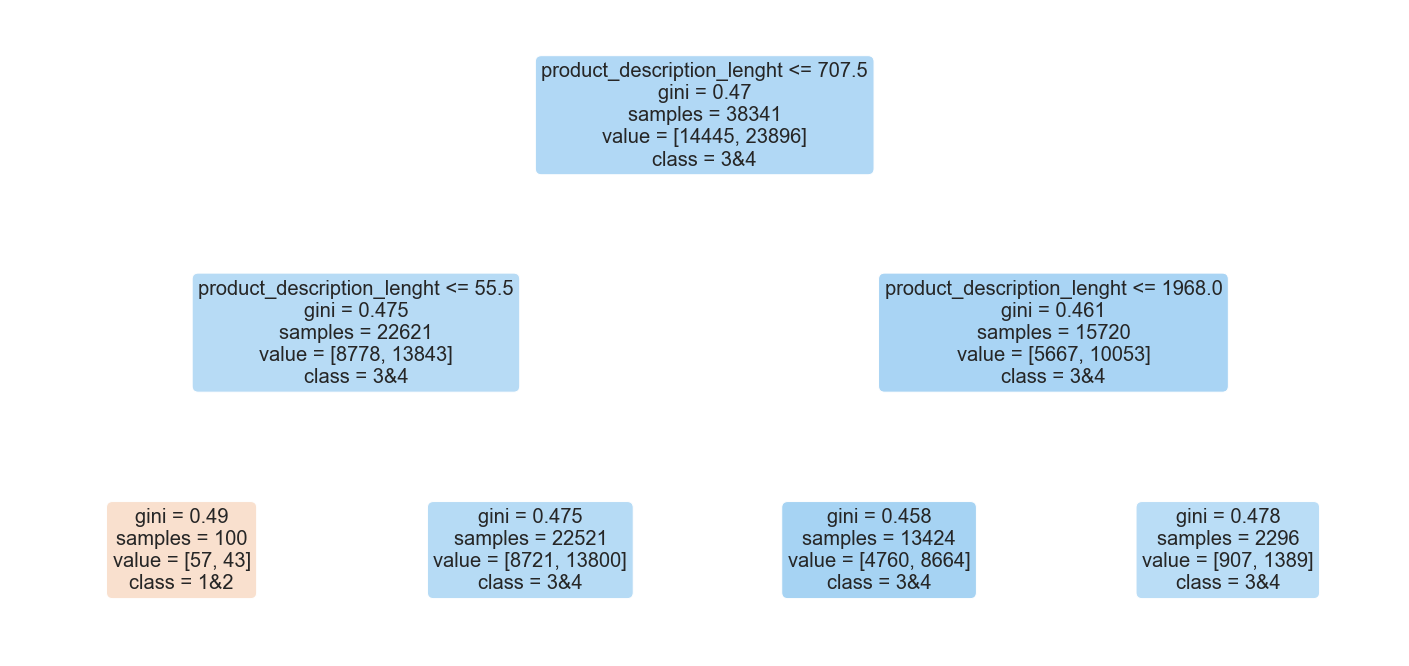

In [147]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(25,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["product_description_lenght"], 
          class_names=["1&2","3&4"])